<h5>Ondas sonoras - Definir a velocidade do som</h5>
Tubo de Kundt<p>

$$F = \frac{n v}{ 2 l}$$

1° etapa - frequência variável<p>
2° etapa - comprimento variável<p>
Em ambas, a velocidade é o coeficiente angular da reta de melhor ajuste

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

sns.set_style('whitegrid',{"axes.grid":False})
sns.set_context('notebook')

## Modelo com Frequência Variável

In [2]:
#Primeiro: Frequencia variavel

l = 0.12 #em metros
f = [1563.4,3062.4,4514.9,6410,7505] #em Hertz
n = [int(i) for i in range(1,6)]
n2 = [i/(2*l) for i in n]

df_ondas = pd.DataFrame({'frequencia': f, 'n':n2})
print(df_ondas)

   frequencia          n
0      1563.4   4.166667
1      3062.4   8.333333
2      4514.9  12.500000
3      6410.0  16.666667
4      7505.0  20.833333


In [3]:
regressao = smf.ols(data = df_ondas, formula = 'frequencia ~ n').fit()
print(regressao.params)
regressao.summary()

Intercept     41.9000
n            365.5392
dtype: float64


C:\Users\rosan\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             frequencia   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     637.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           0.000136
Time:                        13:51:20   Log-Likelihood:                -32.073
No. Observations:                   5   AIC:                             68.15
Df Residuals:                       3   BIC:                             67.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9000    200.075      0.209      0.848    -594.829     678.629
n            365.5392     14.478     25.248      0.000     319.464     411.615
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.997
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.896
Skew:                           1.025   Prob(JB):                        0.639
Kurtosis:                       2.688   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_ondas['ajuste'] = regressao.fittedvalues

In [5]:
df_ondas

,frequencia,n,ajuste
0,1563.4,4.166667,1564.98
1,3062.4,8.333333,3088.06
2,4514.9,12.500000,4611.14
3,6410.0,16.666667,6134.22
4,7505.0,20.833333,7657.30


plt.scatter(df_ondas["n"],df_ondas["frequencia"], label = "Pontos Medidos", color = "coral")
plt.plot(df_ondas["n"],df_ondas["ajuste"],label = "Regressão Linear",color = "teal")
plt.title('Frequência - Regressão Linear')
plt.legend(('Frequências Medidas','Regressão Linear'))
#plt.savefig("grafico1.png")

In [110]:
plt.style.use('seaborn-notebook')

C:\Users\rosan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1920x1080 with 0 Axes>

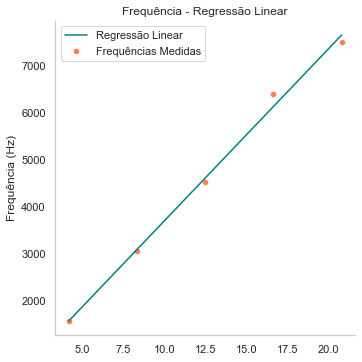

In [10]:
plt.figure(figsize = (1.92,1.08),dpi=1000)
sns.relplot(df_ondas["n"],df_ondas["frequencia"],color = "coral",label = "Frequências Medidas")
plt.plot(df_ondas["n"],df_ondas["ajuste"],label = "Regressão Linear",color = "teal")
plt.title('Frequência - Regressão Linear')
plt.legend(('Regressão Linear','Frequências Medidas'),loc = 'best')
plt.xlabel("")
plt.ylabel("Frequência (Hz)")
plt.savefig("grafico1.png",dpi = 1000)

<p>A velocidade do som, neste caso, é de 365,54 m/s.</p>
<p>O R-quadrado encontrado é de 0,995, o que indica que os valores da reta estão bem próximos dos pontos reais</p>

## Modelo com Comprimento Variável

In [4]:
#Segundo: Comprimento variavel

f = 2000.4 #em Hertz
l = [0.085, 0.173, 0.259, 0.347, 0.434] #em metros
n = [int(i) for i in range(1,6)]
n2 = [i/(2*f) for i in n]

df_ondas2 = pd.DataFrame({'comprimento': l, 'n':n2})
print(df_ondas2)
#df_ondas = pd.DataFrame(np.zeros((len(f),2)))

   comprimento        n
0        0.085  0.00025
1        0.173  0.00050
2        0.259  0.00075
3        0.347  0.00100
4        0.434  0.00125


In [5]:
regressao2 = smf.ols(data = df_ondas2, formula = 'comprimento ~ n').fit()
print(regressao2.params)
regressao.summary()

Intercept     -0.00200
n            348.86976
dtype: float64


C:\Users\rosan\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             frequencia   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     637.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           0.000136
Time:                        13:59:52   Log-Likelihood:                -32.073
No. Observations:                   5   AIC:                             68.15
Df Residuals:                       3   BIC:                             67.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9000    200.075      0.209      0.848    -594.829     678.629
n            365.5392     14.478     25.248      0.000     319.464     411.615
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.997
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.896
Skew:                           1.025   Prob(JB):                        0.639
Kurtosis:                       2.688   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_ondas2['ajuste'] = regressao2.fittedvalues

C:\Users\rosan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2.835000000000001, 0.5, 'Comprimento (m)')

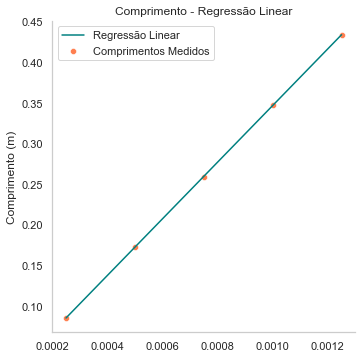

In [15]:
sns.relplot(df_ondas2["n"],df_ondas2["comprimento"],color = "coral",label = "Comprimentos Medidos")
plt.plot(df_ondas2["n"],df_ondas2["ajuste"],label = "Regressão Linear",color = "teal")
plt.title('Comprimento - Regressão Linear')
plt.legend(('Regressão Linear','Comprimentos Medidos'),loc = 'best')
plt.xlabel("")
plt.ylabel("Comprimento (m)")

<p>A velocidade do som para este caso é de 348,87 m/s</p>
<p>O R-quadrado também é de 0,995, indicando uma reta bem ajustada aos valores reais</p>